In [10]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pylab
%pip install seaborn
%pip install sktime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sktime

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [32]:
df_cal = pd.read_csv('../Data/calendar.csv', sep=',')

In [33]:
df_cal['date'] = pd.to_datetime(df_cal['date'])

In [39]:
df_cal = df_cal['date']

In [14]:
df_sales = pd.read_csv('../Data/sales.csv', sep=',')

In [15]:
df_sales['date'] = pd.to_datetime(df_sales['date'])

In [16]:
df_sales

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570518,2016-02-29,FOODS_3_823,FOODS_3,FOODS,2
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0
5570520,2016-02-29,FOODS_3_825,FOODS_3,FOODS,0
5570521,2016-02-29,FOODS_3_826,FOODS_3,FOODS,1


In [17]:
df = df_sales.groupby(by='date')['sales'].sum()

<AxesSubplot:xlabel='date', ylabel='sales'>

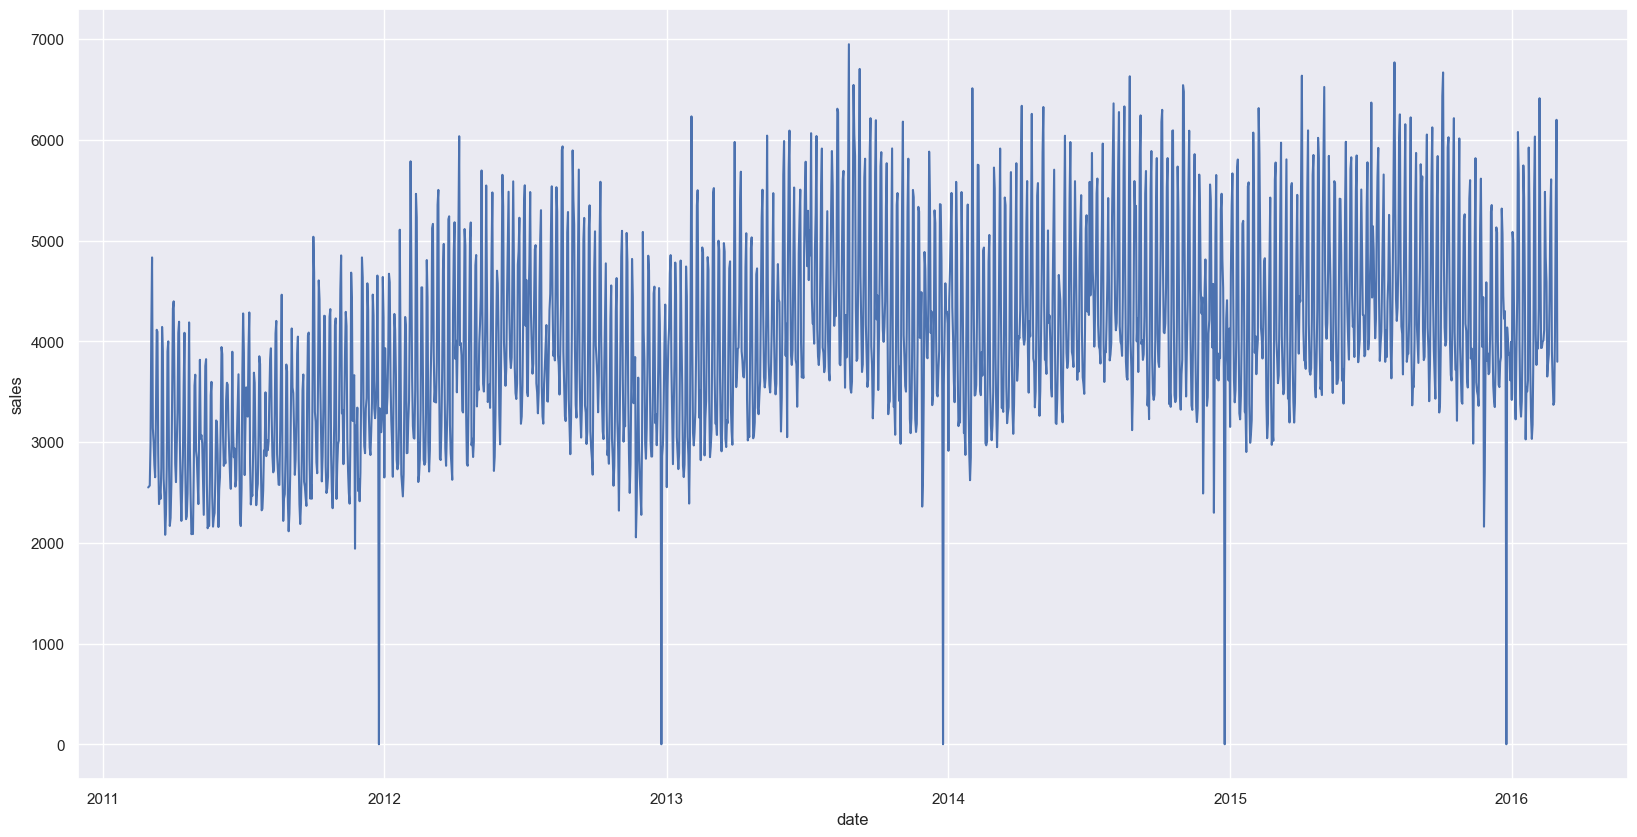

In [18]:
sns.lineplot(data=df)

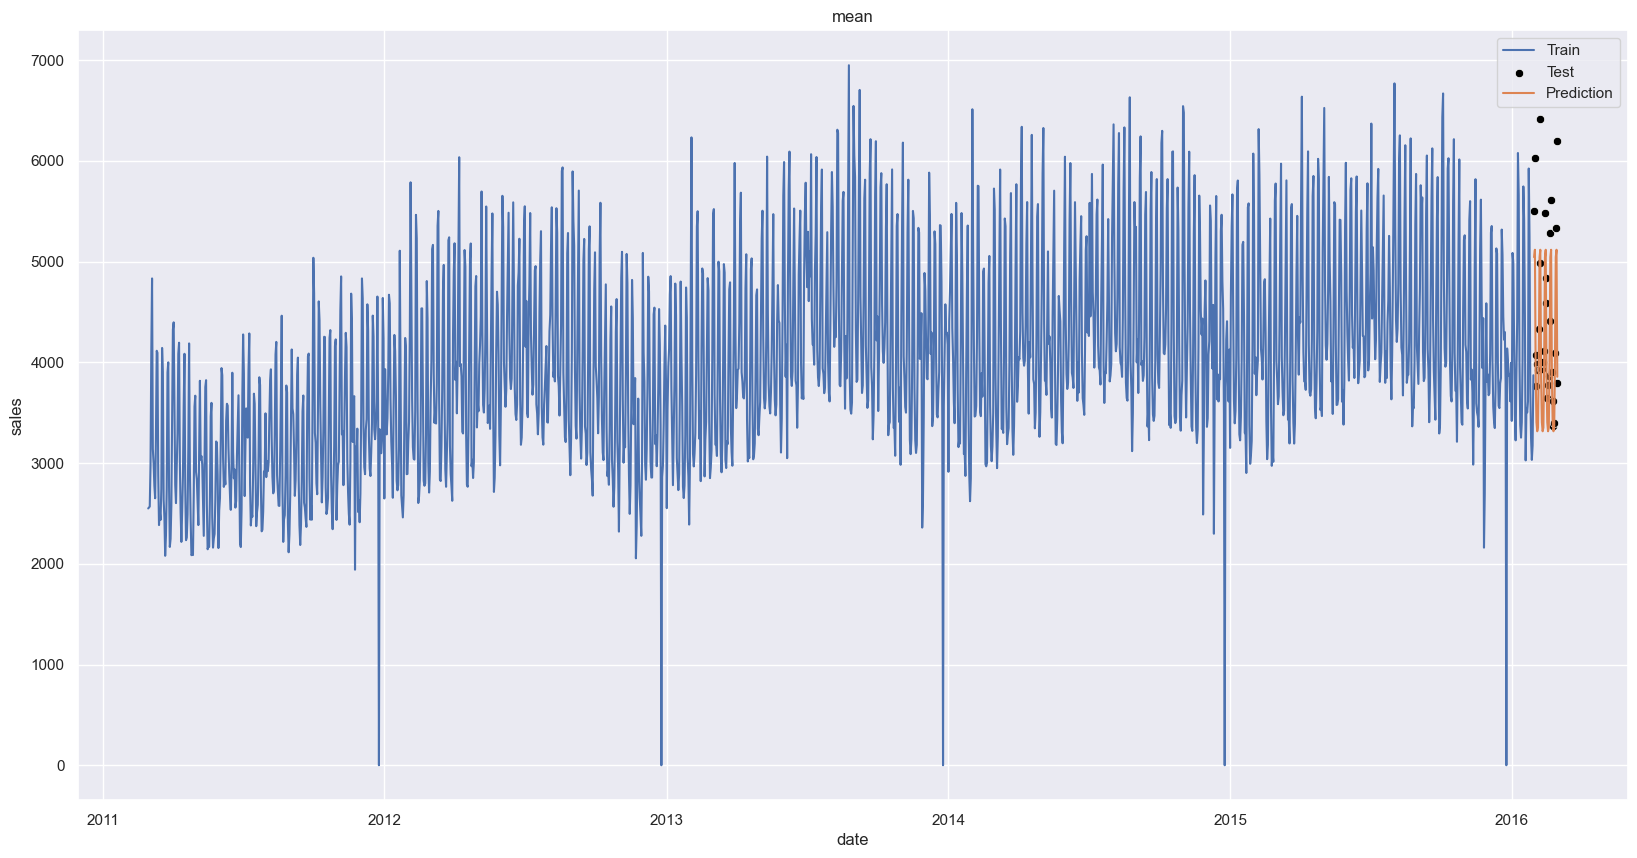

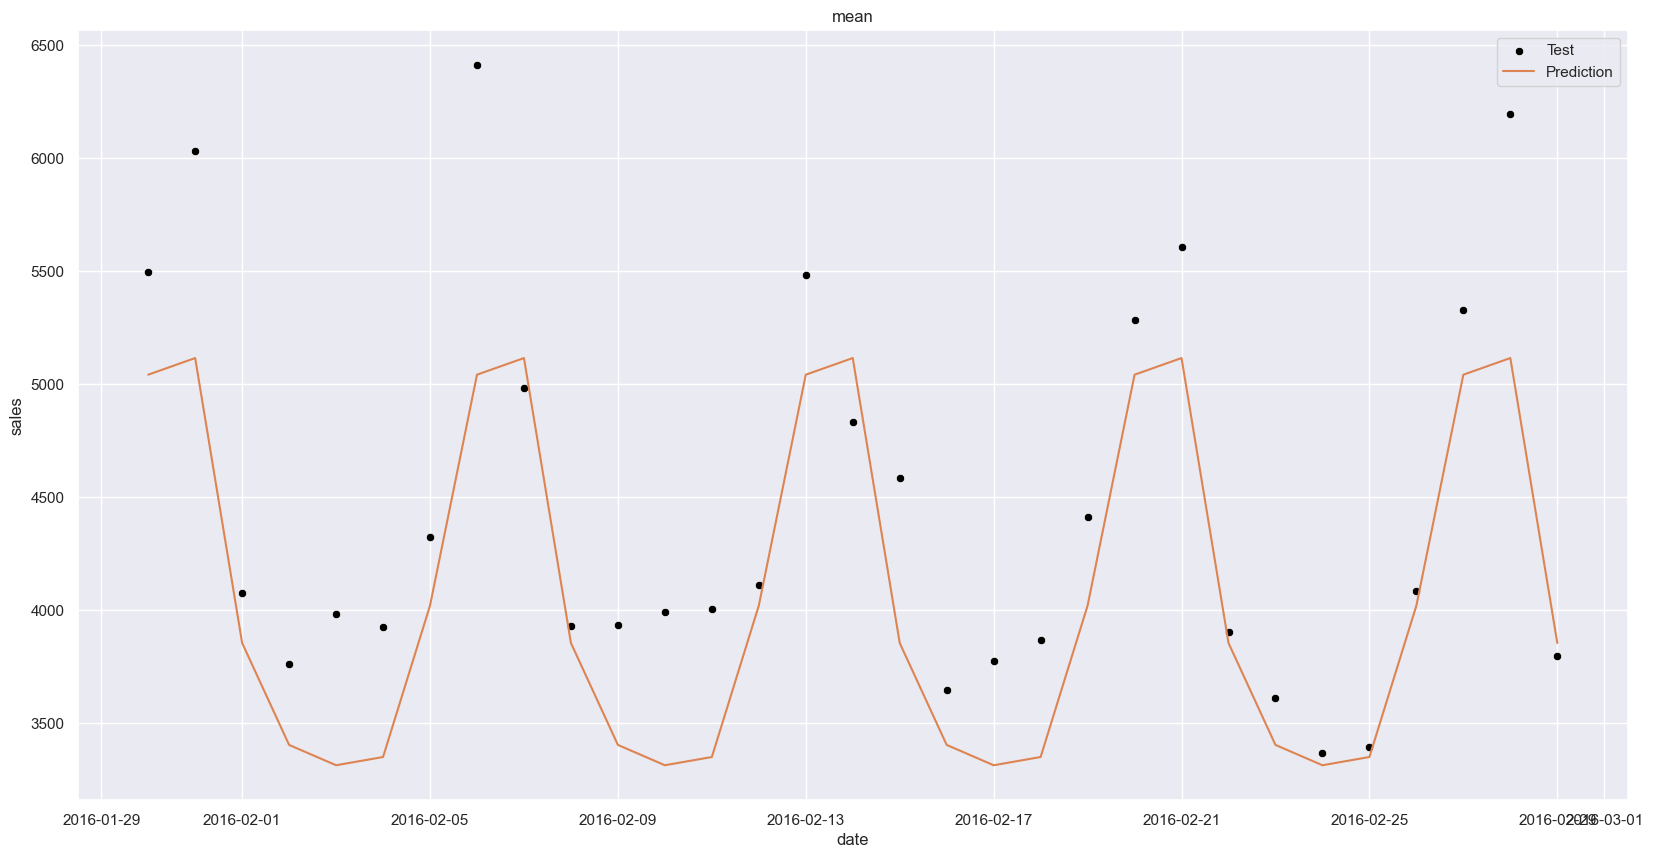

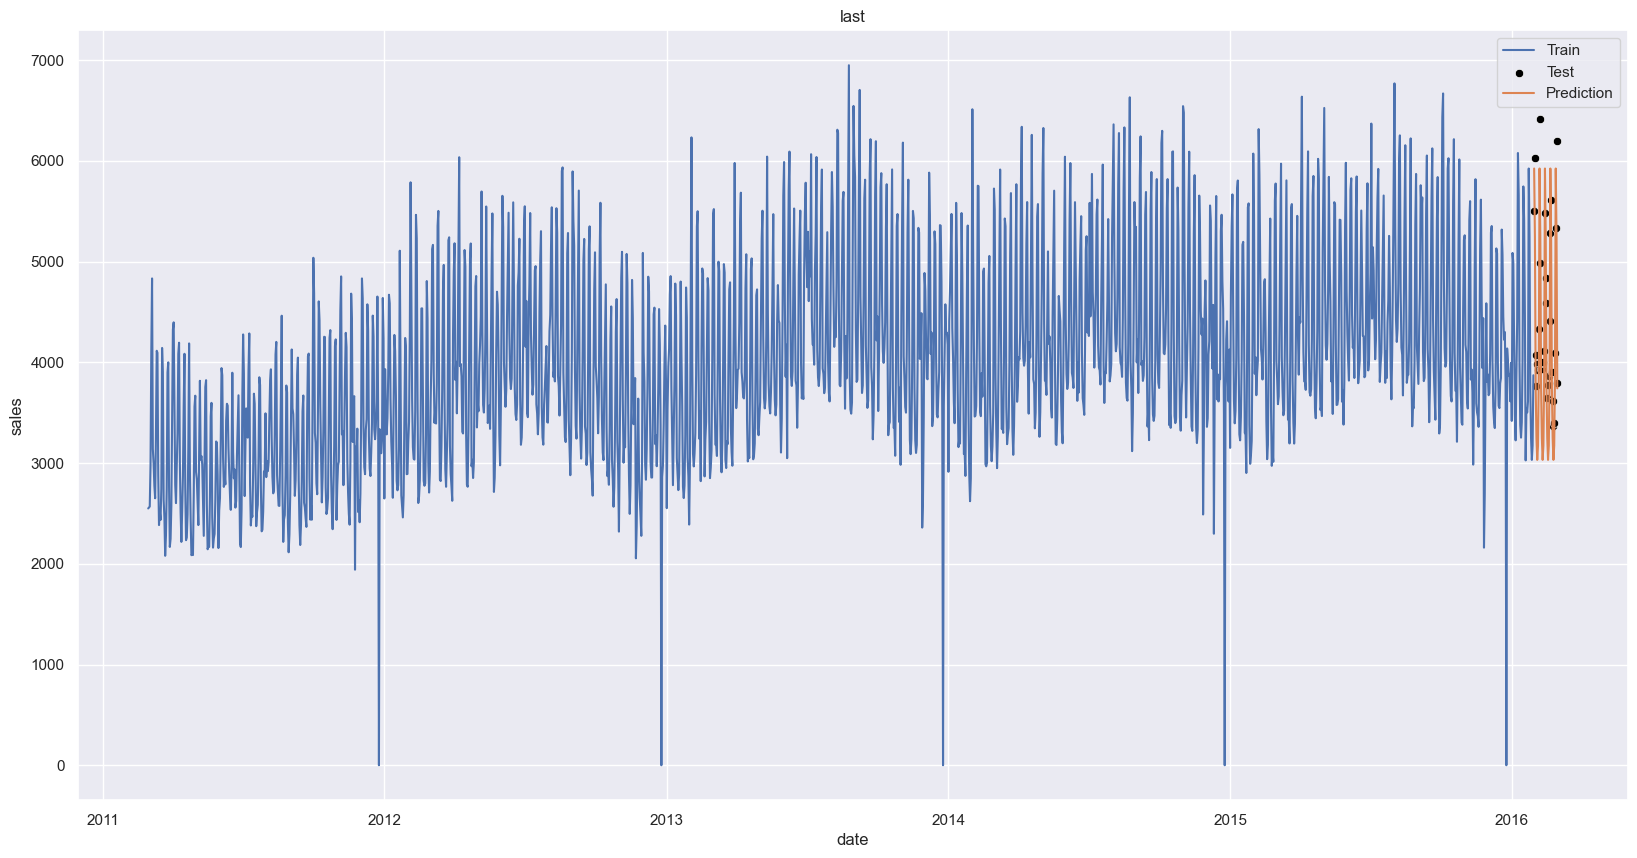

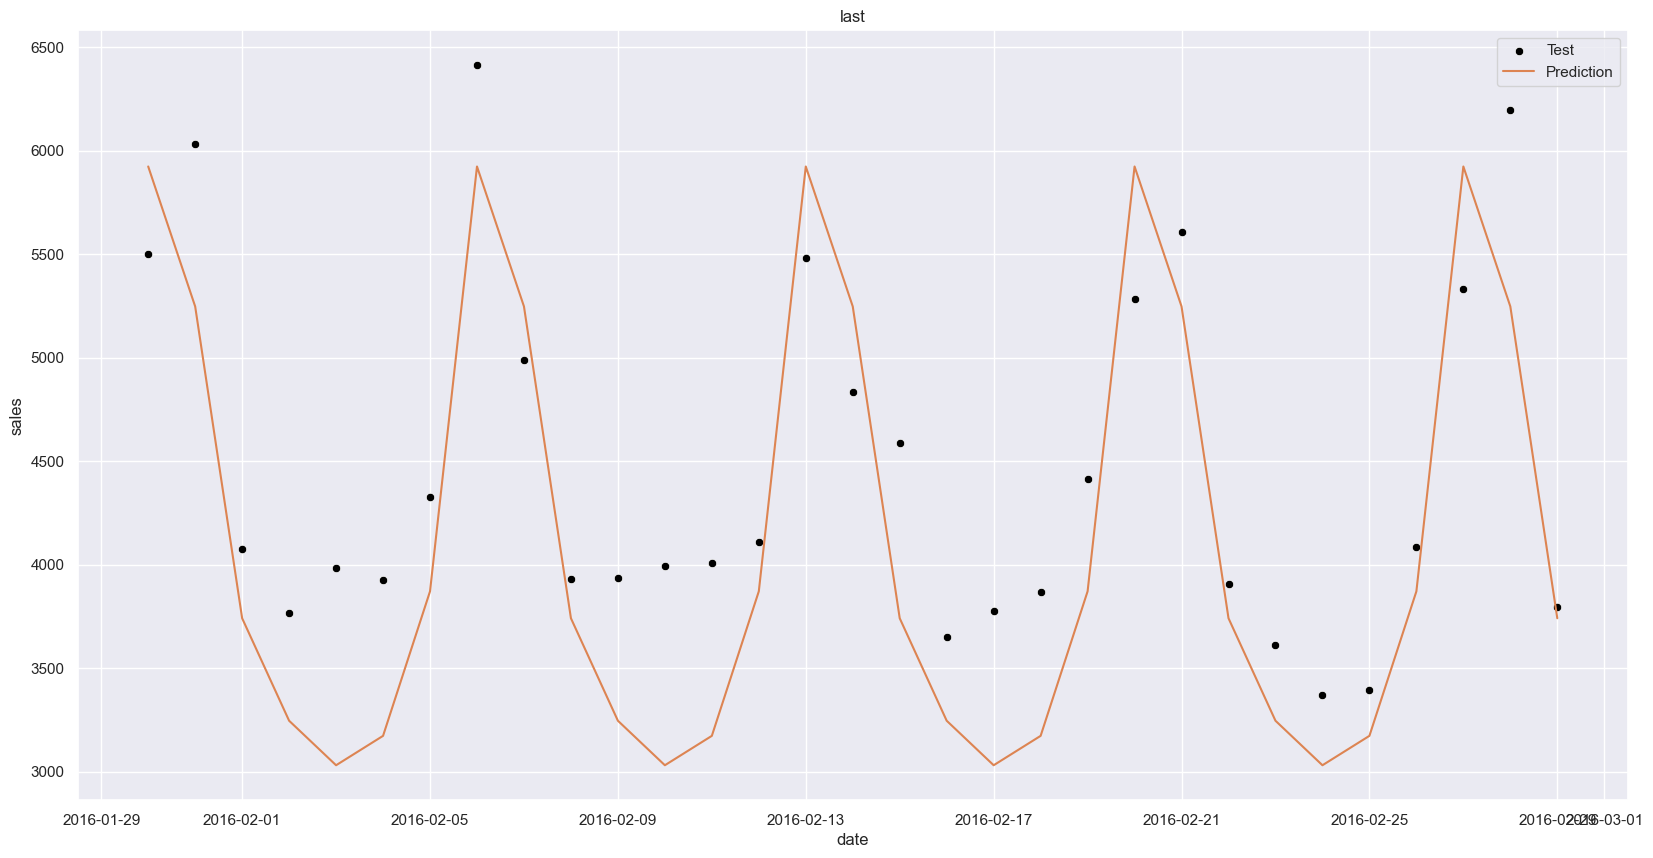

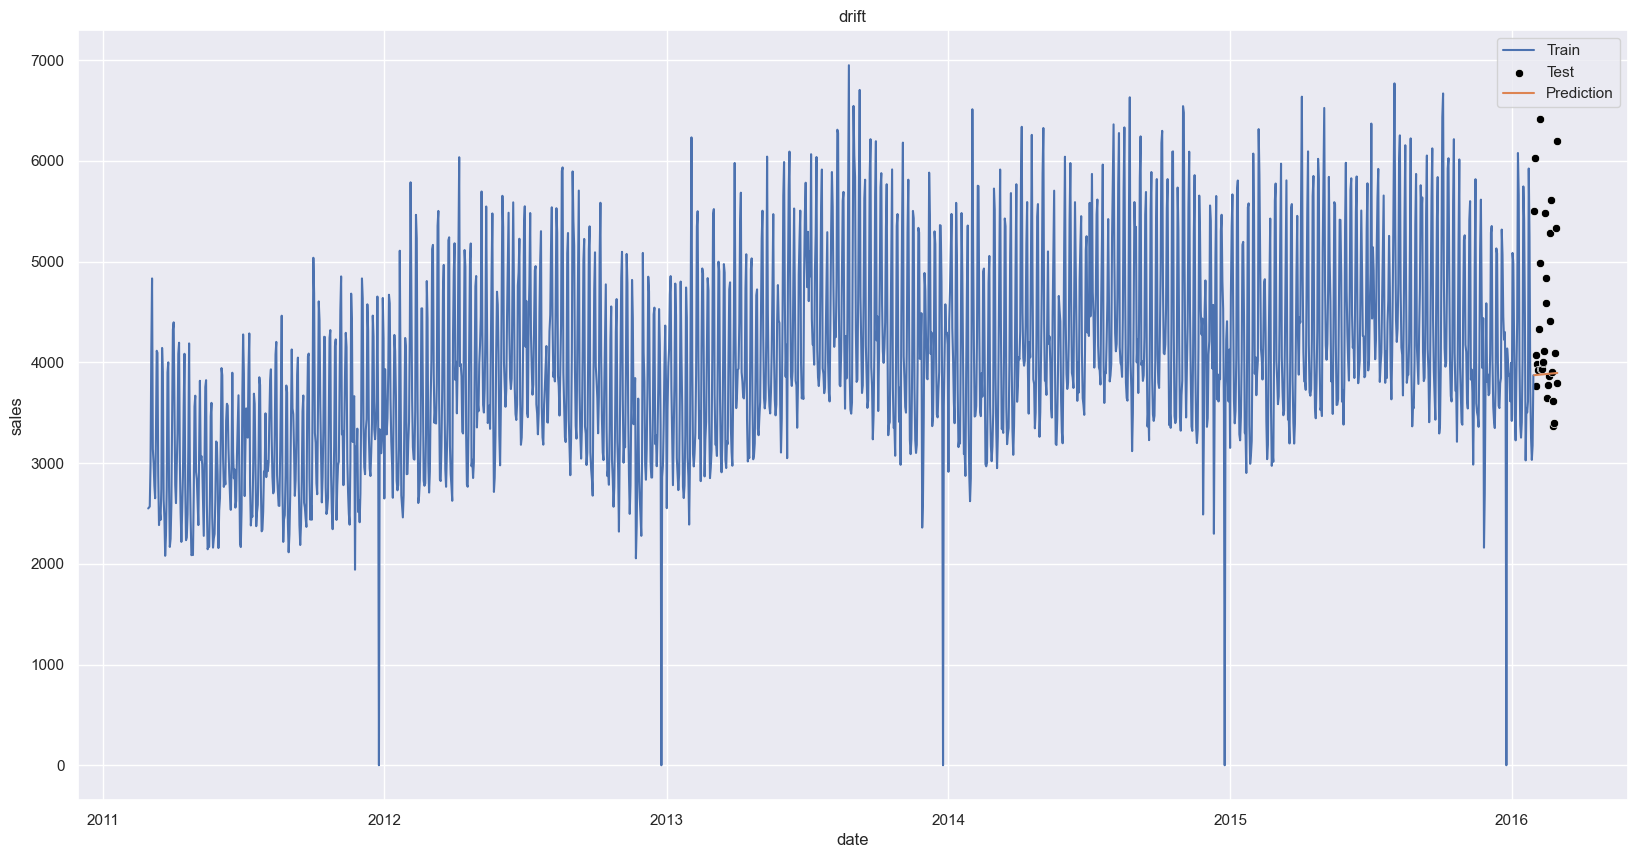

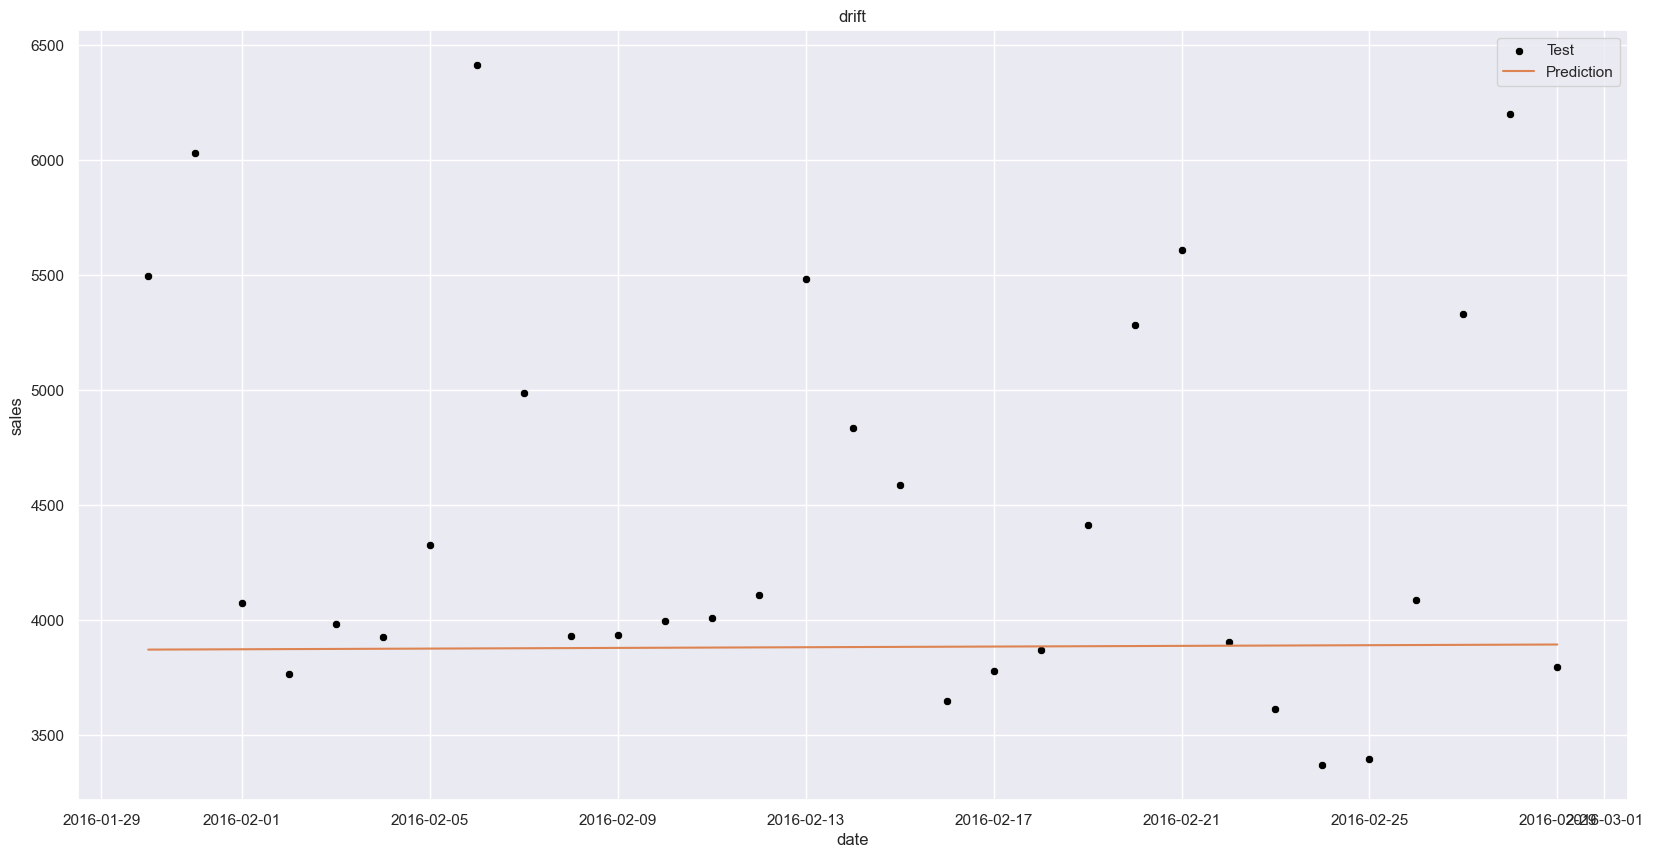

In [19]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

data = df
train, test = temporal_train_test_split(df, test_size = 31)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

for strategy in ['mean', 'last', 'drift']:
    if strategy == 'drift':
        forecast = NaiveForecaster(strategy = strategy)
    else:
        forecast = NaiveForecaster(strategy = strategy, sp = 7)
    forecast.fit(train)
    
    sns.lineplot(data = train, label = 'Train')
    sns.scatterplot(data = test, color = 'black', label = 'Test')
    sns.lineplot(data = forecast.predict(fh), label = 'Prediction')
    plt.title(strategy)
    plt.show()
    
    sns.scatterplot(data = test, color = 'black', label = 'Test')
    sns.lineplot(data = forecast.predict(fh), color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
    plt.title(strategy)
    plt.show()

In [20]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

data = df
train, test = temporal_train_test_split(data, test_size = 31)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

for strategy in ['mean', 'last', 'drift']:
    if strategy == 'drift':
        forecast = NaiveForecaster(strategy = strategy)
    else:
        forecast = NaiveForecaster(strategy = strategy, sp = 7)
    forecast.fit(train)
    print('MAE:\t %4.2f' % (MAE(y_true = test, y_pred = forecast.predict(fh))))

MAE:	 409.02
MAE:	 512.65
MAE:	 694.68


# Exponential Smoothing

c:\Users\Dave\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


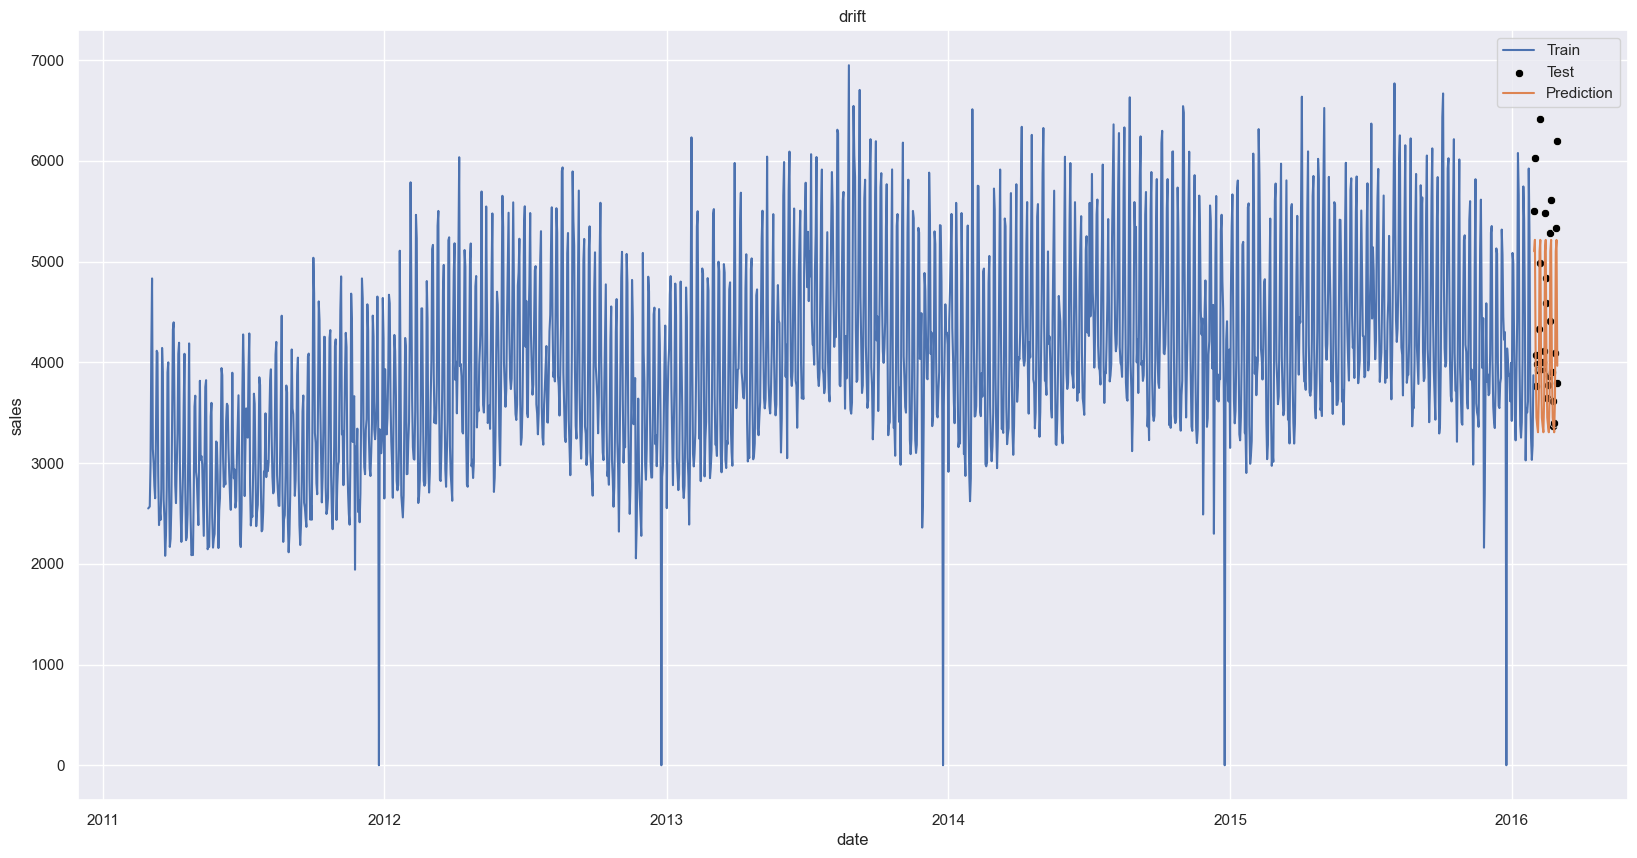

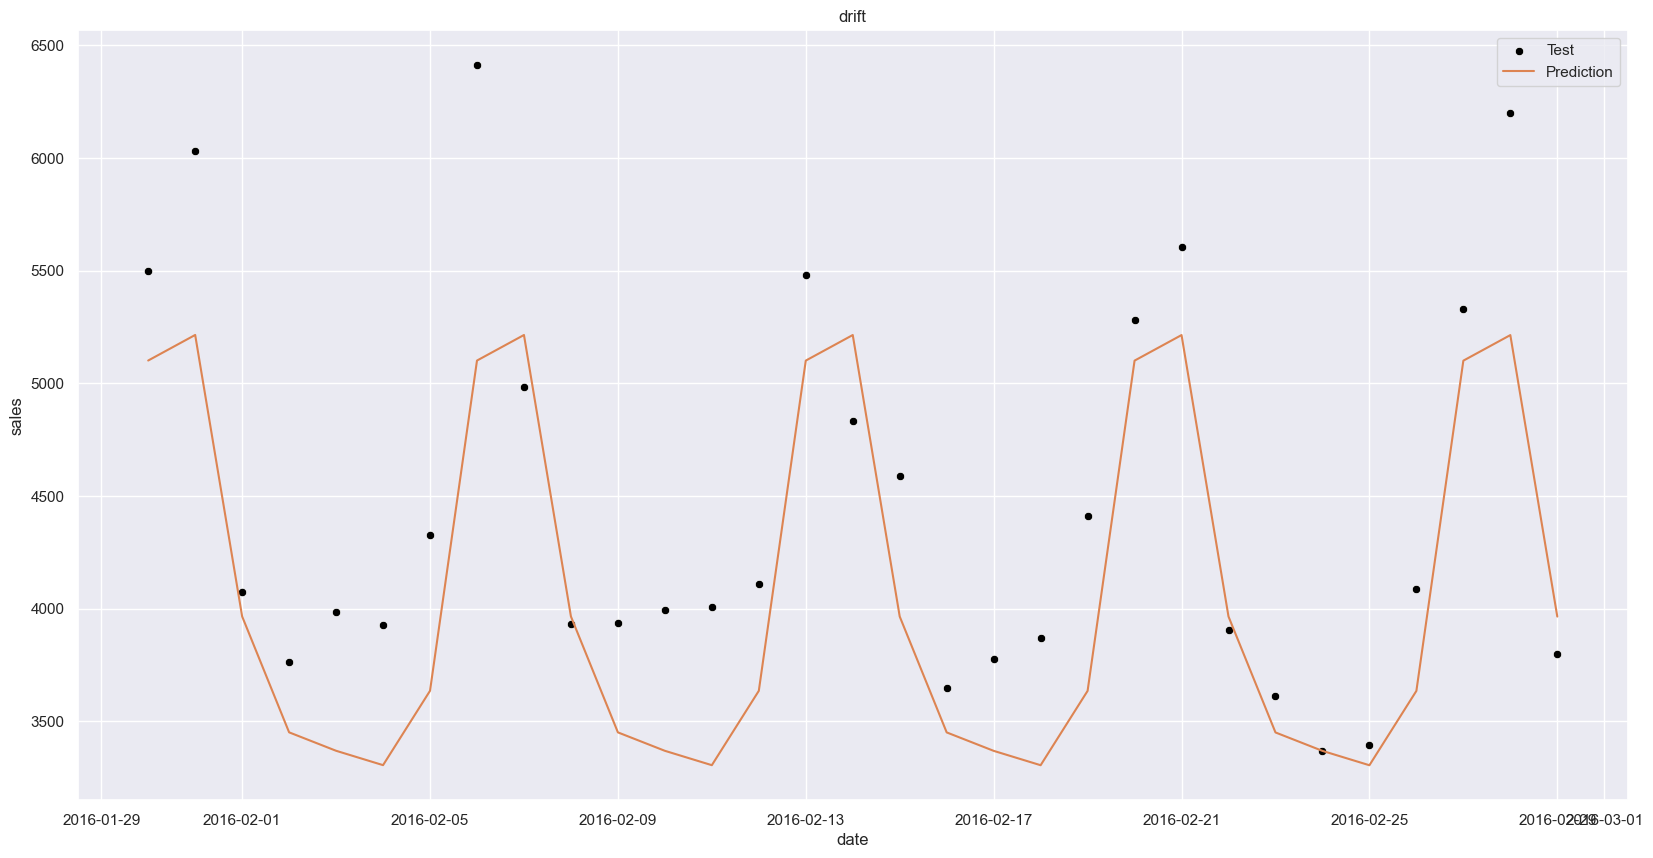

In [23]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

data = df
train, test = temporal_train_test_split(df, test_size = 31)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

ets = ExponentialSmoothing(
    seasonal='add',
    sp= 7,
    trend='add',
    damped_trend=True,
)

ets.fit(train)
    
sns.lineplot(data = train, label = 'Train')
sns.scatterplot(data = test, color = 'black', label = 'Test')
sns.lineplot(data = ets.predict(fh), label = 'Prediction')
plt.title(strategy)
plt.show()

sns.scatterplot(data = test, color = 'black', label = 'Test')
sns.lineplot(data = ets.predict(fh), color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title(strategy)
plt.show()

In [24]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

data = df
train, test = temporal_train_test_split(data, test_size = 31)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

ets = ExponentialSmoothing(
    seasonal='add',
    sp= 7,
    trend='add',
    damped_trend=True,
)

ets.fit(train)

print('MAE:\t %4.2f' % (MAE(y_true = test, y_pred = ets.predict(fh))))

MAE:	 434.83


c:\Users\Dave\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [25]:
ets.predict()

date
2016-01-30    5101.393557
2016-01-31    5214.863496
2016-02-01    3965.436938
2016-02-02    3450.993296
2016-02-03    3369.174459
2016-02-04    3305.372898
2016-02-05    3635.420404
2016-02-06    5101.221713
2016-02-07    5214.693371
2016-02-08    3965.268514
2016-02-09    3450.826557
2016-02-10    3369.009387
2016-02-11    3305.209477
2016-02-12    3635.258617
2016-02-13    5101.061544
2016-02-14    5214.534804
2016-02-15    3965.111532
2016-02-16    3450.671145
2016-02-17    3368.855529
2016-02-18    3305.057158
2016-02-19    3635.107821
2016-02-20    5100.912256
2016-02-21    5214.387008
2016-02-22    3964.965215
2016-02-23    3450.526290
2016-02-24    3368.712123
2016-02-25    3304.915186
2016-02-26    3634.967269
2016-02-27    5100.773110
2016-02-28    5214.249254
2016-02-29    3964.828837
Freq: D, Name: sales, dtype: float64

In [26]:
df_cal = df_cal['date']

In [54]:
df_cal = df_cal.iloc[1827:1857]

In [55]:
ets.predict(df_cal)

TypeError: Invalid `fh`. The type of the passed `fh` values is not supported. Please use one of ('int', '1D np.ndarray of type int', '1D np.ndarray of type timedelta or dateoffset', 'list', 'pd.RangeIndex', 'pd.PeriodIndex', 'pd.DatetimeIndex', 'pd.TimedeltaIndex'), but found type <class 'pandas.core.series.Series'>, values = 1827   2016-03-01
1828   2016-03-02
1829   2016-03-03
1830   2016-03-04
1831   2016-03-05
1832   2016-03-06
1833   2016-03-07
1834   2016-03-08
1835   2016-03-09
1836   2016-03-10
1837   2016-03-11
1838   2016-03-12
1839   2016-03-13
1840   2016-03-14
1841   2016-03-15
1842   2016-03-16
1843   2016-03-17
1844   2016-03-18
1845   2016-03-19
1846   2016-03-20
1847   2016-03-21
1848   2016-03-22
1849   2016-03-23
1850   2016-03-24
1851   2016-03-25
1852   2016-03-26
1853   2016-03-27
1854   2016-03-28
1855   2016-03-29
1856   2016-03-30
Name: date, dtype: datetime64[ns]